# 6.1 ESA Sourcing open data - Part 1

## Table of Contents

### 01. Import libraries and datasets

### 02. Verify dataset import results

### 03. Wrangle variables datatype

### 04. Data cleaning

> #### 04.01 Missing values

> #### 04.02 Duplicates

> #### 04.03 Mixed datatypes

> #### 04.04 Inconsistent text formatting or spelling variations

> #### 04.05 Trim whitespace

### 05. Preliminary data exploration

> #### 05.01 Descriptive statistics for raw data

>> ##### OECD Countries (22)

>> ##### FX, VIX, Commodities

> #### 05.02 Line plots of selected data

>> #### OECD countries subset: United States, Germany, Japan, South Korea, Australia, Norway and Switzerland

>> #### Selected FX pairs, VIX and commodities

## 01. Import libraries and datasets

In [6]:
# Import libraries

import pandas as pd
import numpy as np
import os

In [9]:
# Create string path to main project folder, to use with a Python shortcut for importing files

path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'

# Import first dataset

fx_vix_comm = pd.read_excel(os.path.join(path, 'Data', 'Original Data', 'fx_vix_comm_shock.xlsx'), index_col = False)

# Import second dataset

oecd_ctry = pd.read_excel(os.path.join(path, 'Data', 'Original Data', 'oecd_ctry_shock.xlsx'), index_col = False)

## 02. Verify dataset import results

#### First dataframe: fx_vix_comm

In [16]:
# Confirm dimensions of first dataset

fx_vix_comm.shape

(244, 42)

In [22]:
# Display first 3 rows

fx_vix_comm.head(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg,brent_avg,nat_gas_eu_avg,lng_asia_avg,metals_idx_avg,iron_ore_avg,copper_avg,aluminum_avg,gold_oz_usd,food_idx_avg
0,2005-01-01,2005,1,2005-01,Jan,0,0,0,0,0,...,46.84,44.174762,5.06,5.82,77.734825,28.11,3168.100000,1836.175,424.03,76.506190
1,2005-02-01,2005,2,2005-02,Feb,0,0,0,0,0,...,47.97,45.721000,5.06,6.10,80.009994,28.11,3247.100000,1882.775,423.35,79.020403
2,2005-03-01,2005,3,2005-03,Mar,0,0,0,0,0,...,54.31,53.229130,5.06,6.46,82.993805,28.11,3378.904762,1987.500,433.85,80.939395


In [24]:
# Display middle columns for first 3 rows

fx_vix_comm.loc[0:2, 'boj_int_rate_flag':'wti_avg']

,boj_int_rate_flag,aud_cad,aud_jpy,chf_aud,chf_cad,chf_jpy,eur_aud,eur_cad,eur_chf,eur_gbp,...,gbp_jpy,gbp_usd,usd_aud,usd_cad,usd_chf,usd_jpy,vix_avg,all_comm_idx_avg,energy_idx_avg,wti_avg
0,0,0.928367,78.330489,1.123110,1.041260,87.877385,1.736459,1.609950,1.546160,0.706723,...,192.418289,1.881536,1.305780,1.212269,1.164666,102.284629,13.438000,85.468784,108.963343,46.84
1,0,0.968349,82.004410,1.073662,1.039683,88.042233,1.664662,1.611948,1.550515,0.689548,...,197.954685,1.884889,1.280876,1.240262,1.193159,105.023214,11.708947,87.430914,110.972850,47.97
2,0,0.956241,82.602535,1.084378,1.036934,89.571137,1.680383,1.606823,1.549643,0.692668,...,200.389627,1.905998,1.272960,1.217142,1.173979,105.145969,13.126364,94.599556,124.990154,54.31


In [26]:
# Display more middle columns for first 3 rows

fx_vix_comm.loc[0:2, 'eur_gbp':'gbp_jpy']

,eur_gbp,eur_jpy,eur_usd,gbp_aud,gbp_cad,gbp_jpy
0,0.706723,135.872721,1.330047,2.456750,2.280446,192.418289
1,0.689548,136.499759,1.299736,2.414136,2.337678,197.954685
2,0.692668,138.802196,1.320237,2.425978,2.319854,200.389627


In [28]:
# Display last 3 rows

fx_vix_comm.tail(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg,brent_avg,nat_gas_eu_avg,lng_asia_avg,metals_idx_avg,iron_ore_avg,copper_avg,aluminum_avg,gold_oz_usd,food_idx_avg
241,2025-02-01,2025,2,2025-02,Feb,0,0,0,1,1,...,71.53,75.193000,15.332,14.721,186.290395,108.200000,9330.975000,2655.772500,2894.73,132.053403
242,2025-03-01,2025,3,2025-03,Mar,0,0,0,1,1,...,68.24,71.741429,13.128,13.118,187.309278,103.652381,9735.823333,2651.598571,2983.30,128.971563
243,2025-04-01,2025,4,2025-04,Apr,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Display middle columns for last 3 rows

fx_vix_comm.loc[241:243, 'boj_int_rate_flag':'wti_avg']

,boj_int_rate_flag,aud_cad,aud_jpy,chf_aud,chf_cad,chf_jpy,eur_aud,eur_cad,eur_chf,eur_gbp,...,gbp_jpy,gbp_usd,usd_aud,usd_cad,usd_chf,usd_jpy,vix_avg,all_comm_idx_avg,energy_idx_avg,wti_avg
241,1,0.901444,95.680309,1.755537,1.582514,167.983554,1.652291,1.489444,0.941199,0.831094,...,190.289954,1.253261,1.586433,1.430058,0.903681,151.726269,16.968000,171.957912,183.070594,71.53
242,1,0.904555,93.836516,1.796928,1.625412,168.615143,1.716710,1.552891,0.955356,0.837763,...,192.282790,1.289607,1.589022,1.437326,0.884314,149.104581,21.841429,167.369530,172.721926,68.24
243,1,0.877573,90.604038,1.910427,1.676049,173.028984,1.788142,1.568841,0.936158,0.855579,...,189.321827,1.310822,1.594921,1.399150,0.835084,144.456741,33.181667,NaN,NaN,NaN


In [32]:
# Display more middle columns for last 3 rows

fx_vix_comm.loc[241:243, 'eur_gbp':'gbp_jpy']

,eur_gbp,eur_jpy,eur_usd,gbp_aud,gbp_cad,gbp_jpy
241,0.831094,158.122056,1.041557,1.988117,1.792177,190.289954
242,0.837763,161.089924,1.080430,2.049132,1.853550,192.282790
243,0.855579,161.967255,1.121527,2.089943,1.833750,189.321827


#### Second dataframe: oecd_ctry

In [39]:
# Confirm dimensions of second dataset

oecd_ctry.shape

(5346, 22)

In [41]:
# Display first 3 rows

oecd_ctry.head(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,int_rate_ovn,int_rate_3m,int_rate_10y,stock_index,cons_prices,cpi_rate,gdp_pc_usd,real_gdp_chg_pct,unemp_rate,population
0,Australia,2005-01-01,2005,1,2005-01,Jan,0,0,0,0,...,5.25,5.42,5.351842,73.98145,NaN,2.369077,36260.401,3.0,5.072046,20176844.0
1,Australia,2005-02-01,2005,2,2005-02,Feb,0,0,0,0,...,5.25,5.63,5.397750,75.64436,NaN,2.369077,36260.401,3.0,5.083576,20176844.0
2,Australia,2005-03-01,2005,3,2005-03,Mar,0,0,0,0,...,5.49,5.81,5.652619,76.39803,NaN,2.369077,36260.401,3.0,5.162230,20176844.0


In [43]:
# Display middle columns for first 3 rows

oecd_ctry.loc[0:2, 'rus_ukr_war_flag':'int_rate_ovn']

,rus_ukr_war_flag,boj_int_rate_flag,fx_to_usd,int_rate_ovn
0,0,0,1.305748,5.25
1,0,0,1.281180,5.25
2,0,0,1.274161,5.49


In [45]:
# Display last 3 rows

oecd_ctry.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,int_rate_ovn,int_rate_3m,int_rate_10y,stock_index,cons_prices,cpi_rate,gdp_pc_usd,real_gdp_chg_pct,unemp_rate,population
5343,United States,2025-01-01,2025,1,2025-01,Jan,0,0,0,1,...,4.33,4.33,4.63,183.0461,134.028783,3.000483,89105.202,1.8,4.0,347300000.0
5344,United States,2025-02-01,2025,2,2025-02,Feb,0,0,0,1,...,4.33,4.34,4.45,187.7849,134.624099,2.821549,89105.202,1.8,4.1,347300000.0
5345,United States,2025-03-01,2025,3,2025-03,Mar,0,0,0,1,...,4.33,4.29,4.28,182.0630,134.926609,2.390725,89105.202,1.8,4.1,347300000.0


In [47]:
# Display middle columns for last 3 rows

oecd_ctry.loc[5343:5345, 'rus_ukr_war_flag':'int_rate_ovn']

,rus_ukr_war_flag,boj_int_rate_flag,fx_to_usd,int_rate_ovn
5343,1,1,1.0,4.33
5344,1,1,1.0,4.33
5345,1,1,1.0,4.33


## 03. Wrangle variables datatype

#### First dataframe: fx_vix_comm

In [51]:
# Check dataframe profile and datatypes

fx_vix_comm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   timestamp          244 non-null    datetime64[ns]
 1   year               244 non-null    int64         
 2   month              244 non-null    int64         
 3   year_month         244 non-null    object        
 4   month_text         244 non-null    object        
 5   gfc_flag           244 non-null    int64         
 6   cpc_flag           244 non-null    int64         
 7   cov_19_flag        244 non-null    int64         
 8   rus_ukr_war_flag   244 non-null    int64         
 9   boj_int_rate_flag  244 non-null    int64         
 10  aud_cad            244 non-null    float64       
 11  aud_jpy            244 non-null    float64       
 12  chf_aud            244 non-null    float64       
 13  chf_cad            244 non-null    float64       
 14  chf_jpy   

In [101]:
# Change the 5 exogenous shock flag variables datatype into Boolean, to facilitate future tasks involving these independent variables

fx_vix_comm[["gfc_flag", "cpc_flag", "cov_19_flag", "rus_ukr_war_flag", "boj_int_rate_flag"]] = \
    fx_vix_comm[["gfc_flag", "cpc_flag", "cov_19_flag", "rus_ukr_war_flag", "boj_int_rate_flag"]].astype(bool)

In [103]:
# Verify datatype changes

fx_vix_comm[["gfc_flag", "cpc_flag", "cov_19_flag", "rus_ukr_war_flag", "boj_int_rate_flag"]].dtypes

gfc_flag             bool
cpc_flag             bool
cov_19_flag          bool
rus_ukr_war_flag     bool
boj_int_rate_flag    bool
dtype: object

In [89]:
# Round some floating-point variables data to 2 decimal places, for consistency and apples-to-apples on significant figures

cols_to_round = ['aud_cad', 'aud_jpy', 'chf_aud', 'chf_cad', 'chf_jpy', 'eur_aud', 'eur_cad', 'eur_chf', 'eur_gbp', 'eur_jpy', 'eur_usd', \
   'gbp_aud', 'gbp_cad', 'gbp_jpy', 'gbp_usd', 'usd_aud', 'usd_cad', 'usd_chf', 'usd_jpy', 'vix_avg', 'all_comm_idx_avg', 'energy_idx_avg', \
      'wti_avg', 'brent_avg', 'nat_gas_eu_avg', 'lng_asia_avg', 'metals_idx_avg', 'iron_ore_avg', 'copper_avg', 'aluminum_avg', \
            'gold_oz_usd', 'food_idx_avg']
fx_vix_comm[cols_to_round] = fx_vix_comm[cols_to_round].round(2)

In [109]:
# Verify the rounding for a few columns

fx_vix_comm.loc[0:2, 'gbp_usd':'lng_asia_avg']

,gbp_usd,usd_aud,usd_cad,usd_chf,usd_jpy,vix_avg,all_comm_idx_avg,energy_idx_avg,wti_avg,brent_avg,nat_gas_eu_avg,lng_asia_avg
0,1.88,1.31,1.21,1.16,102.28,13.44,85.47,108.96,46.84,44.17,5.06,5.82
1,1.88,1.28,1.24,1.19,105.02,11.71,87.43,110.97,47.97,45.72,5.06,6.10
2,1.91,1.27,1.22,1.17,105.15,13.13,94.60,124.99,54.31,53.23,5.06,6.46


#### Second dataframe: oecd_ctry

In [57]:
# Check dataframe profile and datatypes

oecd_ctry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5346 entries, 0 to 5345
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   country            5346 non-null   object        
 1   timestamp          5346 non-null   datetime64[ns]
 2   year               5346 non-null   int64         
 3   month              5346 non-null   int64         
 4   year_month         5346 non-null   object        
 5   month_text         5346 non-null   object        
 6   gfc_flag           5346 non-null   int64         
 7   cpc_flag           5346 non-null   int64         
 8   cov_19_flag        5346 non-null   int64         
 9   rus_ukr_war_flag   5346 non-null   int64         
 10  boj_int_rate_flag  5346 non-null   int64         
 11  fx_to_usd          5346 non-null   float64       
 12  int_rate_ovn       5293 non-null   float64       
 13  int_rate_3m        5346 non-null   float64       
 14  int_rate

In [59]:
# Change the 5 exogenous shock flag variables datatype into Boolean, to facilitate future tasks involving these independent variables

oecd_ctry[["gfc_flag", "cpc_flag", "cov_19_flag", "rus_ukr_war_flag", "boj_int_rate_flag"]] = \
    oecd_ctry[["gfc_flag", "cpc_flag", "cov_19_flag", "rus_ukr_war_flag", "boj_int_rate_flag"]].astype(bool)

In [755]:
# Verify datatype changes

oecd_ctry[["gfc_flag", "cpc_flag", "cov_19_flag", "rus_ukr_war_flag", "boj_int_rate_flag"]].dtypes

gfc_flag             bool
cpc_flag             bool
cov_19_flag          bool
rus_ukr_war_flag     bool
boj_int_rate_flag    bool
dtype: object

In [87]:
# Round some floating-point variables data to 2 decimal places, for consistency and apples-to-apples on significant figures

cols_to_round1 = ['fx_to_usd', 'int_rate_ovn', 'int_rate_3m', 'int_rate_10y', 'stock_index', 'cons_prices', 'cpi_rate', \
                 'real_gdp_chg_pct', 'unemp_rate']
oecd_ctry[cols_to_round1] = oecd_ctry[cols_to_round1].round(2)

In [111]:
# Verify the rounding for a few columns

oecd_ctry.loc[0:2, 'fx_to_usd':'population']

,fx_to_usd,int_rate_ovn,int_rate_3m,int_rate_10y,stock_index,cons_prices,cpi_rate,gdp_pc_usd,real_gdp_chg_pct,unemp_rate,population
0,1.31,5.25,5.42,5.35,73.98,NaN,2.37,36260,3.0,5.07,20176844
1,1.28,5.25,5.63,5.40,75.64,NaN,2.37,36260,3.0,5.08,20176844
2,1.27,5.49,5.81,5.65,76.40,NaN,2.37,36260,3.0,5.16,20176844


## 04. Data cleaning

### 04.01 Missing values

In [121]:
# Determine missing values count in descending order for oecd_ctry dataframe

oecd_ctry.isna().sum().sort_values(ascending=False)

cons_prices          546
cpi_rate             303
int_rate_ovn          53
country                0
timestamp              0
unemp_rate             0
real_gdp_chg_pct       0
gdp_pc_usd             0
stock_index            0
int_rate_10y           0
int_rate_3m            0
fx_to_usd              0
boj_int_rate_flag      0
rus_ukr_war_flag       0
cov_19_flag            0
cpc_flag               0
gfc_flag               0
month_text             0
year_month             0
month                  0
year                   0
population             0
dtype: int64

#### Find missing value counts by country for the 3 variables (below)

In [153]:
def count_missing_per_group(df, group_column, columns_to_count):
    grouped_df = df.groupby(group_column)
    missing_counts = grouped_df[columns_to_count].apply(lambda x: x.isnull().sum())

    return missing_counts

In [155]:
oecd_ctry_missing = count_missing_per_group(oecd_ctry, 'country', ['cons_prices', 'cpi_rate', 'int_rate_ovn'])
print(oecd_ctry_missing)

                cons_prices  cpi_rate  int_rate_ovn
country                                            
Australia               243         0             0
Austria                   0         0             0
Belgium                   0         0             0
Canada                    0         0             0
Chile                    15        15             0
Denmark                   0         0             0
Finland                   0         0             0
France                    0         0             0
Germany                   0         0             0
Greece                    0         0             0
Italy                     0         0             0
Japan                    45        45             0
Netherlands               0         0             0
New Zealand             243       243             0
Norway                    0         0             0
Portugal                  0         0             0
South Korea               0         0             0
Spain       

##### Missing values will not be imputed or replaced. Analyses involving the impacted variables will omit the relevant countries with missing values (for those variables), as these range from 6% to 100% of the series data values for a country, e.g. > 5%.

In [168]:
# Determine missing values count in descending order for fx_vix_comm dataframe

fx_vix_comm.isna().sum().sort_values(ascending=False)

food_idx_avg         1
lng_asia_avg         1
all_comm_idx_avg     1
energy_idx_avg       1
brent_avg            1
nat_gas_eu_avg       1
wti_avg              1
metals_idx_avg       1
iron_ore_avg         1
copper_avg           1
aluminum_avg         1
gold_oz_usd          1
year                 0
vix_avg              0
usd_jpy              0
usd_chf              0
usd_cad              0
usd_aud              0
gbp_usd              0
gbp_jpy              0
gbp_cad              0
timestamp            0
eur_usd              0
eur_jpy              0
month                0
year_month           0
month_text           0
gfc_flag             0
cpc_flag             0
cov_19_flag          0
rus_ukr_war_flag     0
boj_int_rate_flag    0
aud_cad              0
aud_jpy              0
chf_aud              0
chf_cad              0
chf_jpy              0
eur_aud              0
eur_cad              0
eur_chf              0
eur_gbp              0
gbp_aud              0
dtype: int64

##### Comment: From prior inspection of fx_vix_comm we noted that data for some variables runs through April 2025 and some through March, hence the 1-count of missing values for those variables with data through March

### 04.02 Duplicates

In [176]:
# Determine whether duplicate rows exist

oecd_ctry.duplicated().sum()

0

In [178]:
fx_vix_comm.duplicated().sum()

0

##### None exist in the dataframes

### 04.03 Mixed datatypes (non-uniform data series datatype)

In [186]:
# Define and run a custom function to check if any column has mixed data types

def check_mixed_types(df):
    mixed_cols = []
    for col in df.columns:
        if df[col].apply(type).nunique() > 1:
            mixed_cols.append(col)
    return mixed_cols

check_mixed_types(oecd_ctry)

[]

In [188]:
check_mixed_types(fx_vix_comm)

[]

##### None exist in the dataframes

### 04.04 Inconsistent text formatting or spelling variations

In [244]:
# Output the month names (text abbreviations) in each dataframe to verify consistent formatting and spelling

oecd_ctry['month_text'].value_counts(dropna=False)

month_text
Jan    462
Feb    462
Mar    462
Apr    440
May    440
Jun    440
Jul    440
Aug    440
Sep    440
Oct    440
Nov    440
Dec    440
Name: count, dtype: int64

In [246]:
fx_vix_comm['month_text'].value_counts(dropna=False)

month_text
Jan    21
Feb    21
Mar    21
Apr    21
May    20
Jun    20
Jul    20
Aug    20
Sep    20
Oct    20
Nov    20
Dec    20
Name: count, dtype: int64

##### No mispellings or inconsistent formatting

##### Comment: The "Missing Values" sub-section above showed all 22 country names in the oecd_ctry dataframe to have consistent spelling and formatting, so we do not need to verify those here

### 04.05 Trim whitespace

In [237]:
# Trim any whitespace that may exist around data values in each dataframe as a precaution and to ensure consistent formatting
# Define and run a custom function for this operation

def strip_whitespace(df):
    str_cols = df.select_dtypes(include=['object'])
    df[str_cols.columns] = str_cols.apply(lambda x: x.str.strip())
    return df

oecd_ctry = strip_whitespace(oecd_ctry)

In [239]:
fx_vix_comm = strip_whitespace(fx_vix_comm)

## 05. Preliminary data exploration

In [8]:
# Create string path to main project folder, to use with a Python shortcut for importing files

path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'

# Import first dataset

fx_vix_comm = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'fx_vix_comm_clean.pkl'))

# Import second dataset

oecd_ctry = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'oecd_ctry_clean.pkl'))

### 05.01 Descriptive statistics for raw data

In [16]:
# Output descriptive statistics on all variables in the oecd_ctry dataframe

oecd_ctry.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
country,5346,22,Australia,243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timestamp,5346,NaN,NaN,NaN,2015-01-30 20:56:17.777777664,2005-01-01 00:00:00,2010-01-01 00:00:00,2015-02-01 00:00:00,2020-03-01 00:00:00,2025-03-01 00:00:00,NaN
year,5346.0,NaN,NaN,NaN,2014.62963,2005.0,2010.0,2015.0,2020.0,2025.0,5.847239
month,5346.0,NaN,NaN,NaN,6.444444,1.0,3.0,6.0,9.0,12.0,3.467988
year_month,5346,243,2005-01,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month_text,5346,12,Jan,462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gfc_flag,5346,2,False,4708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpc_flag,5346,2,False,5148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cov_19_flag,5346,2,False,4488,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rus_ukr_war_flag,5346,2,False,4510,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Output descriptive statistics on all variables in the fx_vix_comm dataframe

fx_vix_comm.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
timestamp,244,NaN,NaN,NaN,2015-02-15 02:09:50.163934464,2005-01-01 00:00:00,2010-01-24 06:00:00,2015-02-15 00:00:00,2020-03-08 18:00:00,2025-04-01 00:00:00,NaN
year,244.0,NaN,NaN,NaN,2014.672131,2005.0,2010.0,2015.0,2020.0,2025.0,5.884265
month,244.0,NaN,NaN,NaN,6.434426,1.0,3.0,6.0,9.0,12.0,3.471193
year_month,244,244,2005-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month_text,244,12,Jan,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gfc_flag,244,2,False,215,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpc_flag,244,2,False,235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cov_19_flag,244,2,False,205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rus_ukr_war_flag,244,2,False,205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
boj_int_rate_flag,244,2,False,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 05.02 Line Plots of Selected Data

#### OECD countries subset: United States, Germany, Japan, South Korea, Australia, Norway and Switzerland

In [252]:
# Create a subset dataframe of the oecd_ctry dataframe to explore 7 countries and selected variables of interest
# Check the dimensions

oecd_ctry_7 = oecd_ctry[oecd_ctry['country'].isin(['United States', 'Germany', 'Japan', 'South Korea', \
                                                   'Australia', 'Norway','Switzerland'])]
oecd_ctry_7.shape

(1701, 22)

In [22]:
# Import visualization libraries

import seaborn as sns
import matplotlib.pyplot as plt

#### Create custom function to line plot a variable for multiple selected countries, with an exogenous economic shocks temporal overlay

In [178]:
import matplotlib.pyplot as plt

def plot_multicountry_variable_with_shocks(df, countries, variable, shock_flags, shock_colors):
    """
    Plot a single variable over time for multiple countries with shaded economic shocks.

    Parameters:
    - df: pandas DataFrame with 'timestamp', 'country', and target variable
    - countries: list of country names (strings) to include in the plot
    - variable: string, name of the variable to plot
    - shock_flags: dict of {shock name: column name with 0/1 shock flags}
    - shock_colors: dict of {shock name: color string for shading}
    """
    df_subset = df[df['country'].isin(countries)]

    fig, ax = plt.subplots(figsize=(14, 8))

    for country in countries:
        df_country = df_subset[df_subset['country'] == country]
        ax.plot(df_country['timestamp'], df_country[variable], label=country)

    # Get y-axis range for label placement
    ymin, ymax = df_subset[variable].min(), df_subset[variable].max()
    yrange = ymax - ymin

    shock_label_offsets = {
        "GFC": 0.8,
        "2014 Commodity Price Collapse": 0.9,
        "COVID-19": 0.85,
        "Russia-Ukraine War": 0.8,
        "BoJ Rate Pivot": 0.75
    }

    for shock, flag in shock_flags.items():
        if flag in df.columns:
            mask = df_subset[flag] == 1
            if mask.any():
                start = df_subset.loc[mask, 'timestamp'].min()
                end = df_subset.loc[mask, 'timestamp'].max()
                ax.axvspan(start, end, color=shock_colors.get(shock, '#ccc'), alpha=0.3)

                midpoint = start + (end - start) / 2
                y_offset_frac = shock_label_offsets.get(shock, 0.9)
                ax.text(midpoint, ymin + yrange * y_offset_frac, shock,
                        ha='center', va='bottom', fontsize=9, fontweight='bold')

    ax.set_title(f"{variable} Across Selected OECD Countries with Economic Shock Zones")
    ax.set_xlabel("Date")
    ax.set_ylabel(variable)
    ax.legend(loc='upper left', ncol=2)
    plt.tight_layout()
    plt.show()

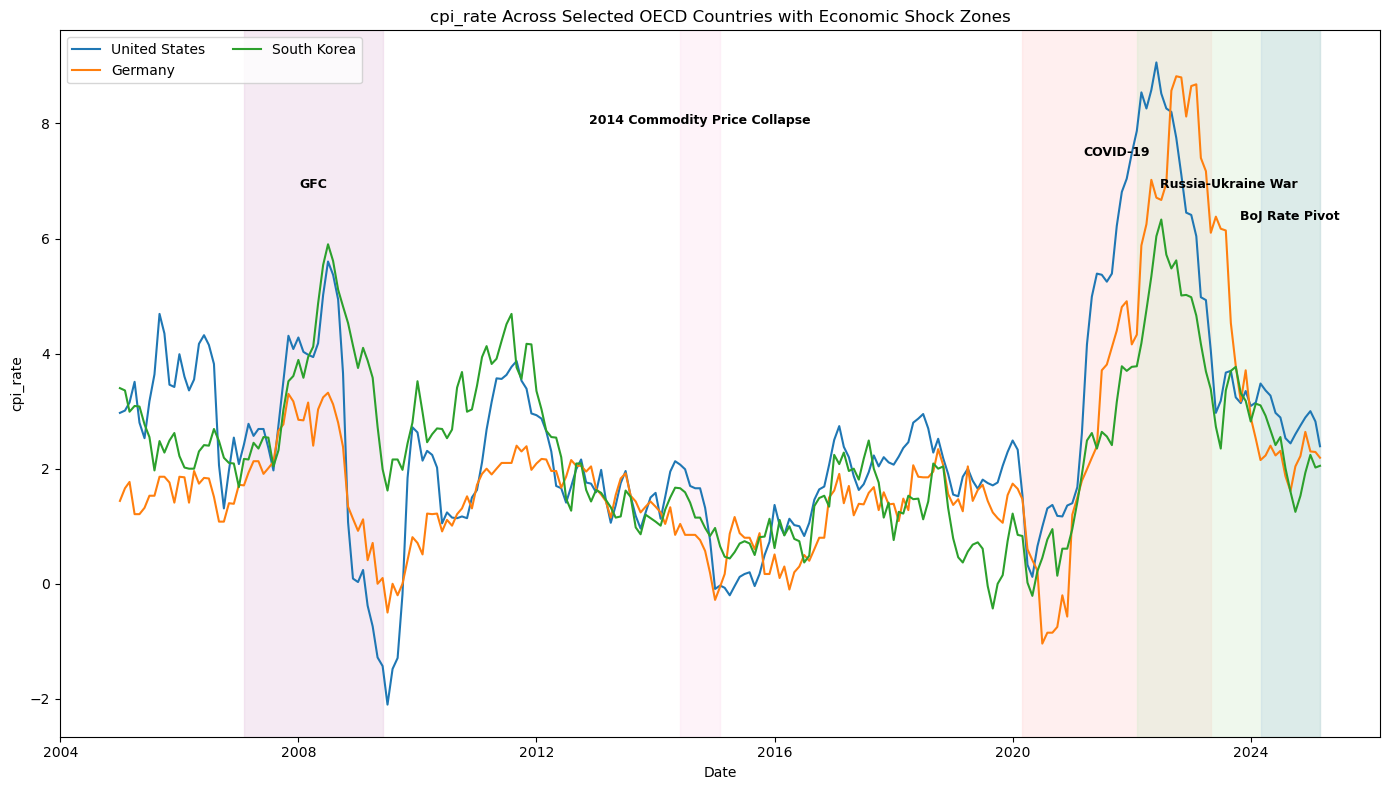

In [224]:
# Call the function to plot consumer price index time series data for 3 countries (Japan omitted due to insufficient CPI data)

shock_flags = {
    "GFC": "gfc_flag",
    "2014 Commodity Price Collapse": "cpc_flag",
    "COVID-19": "cov_19_flag",
    "Russia-Ukraine War": "rus_ukr_war_flag",
    "BoJ Rate Pivot": "boj_int_rate_flag"
}

shock_colors = {
    "GFC": "#e0bbd8",
    "2014 Commodity Price Collapse": "#fddaec",
    "COVID-19": "#ffcccc",
    "Russia-Ukraine War": "#ccebc5",
    "BoJ Rate Pivot": "#b3cde3"
}

plot_multicountry_variable_with_shocks(
    df=oecd_ctry_7,
    countries=['United States', 'Germany', 'South Korea'],
    variable='cpi_rate',
    shock_flags=shock_flags,
    shock_colors=shock_colors
)

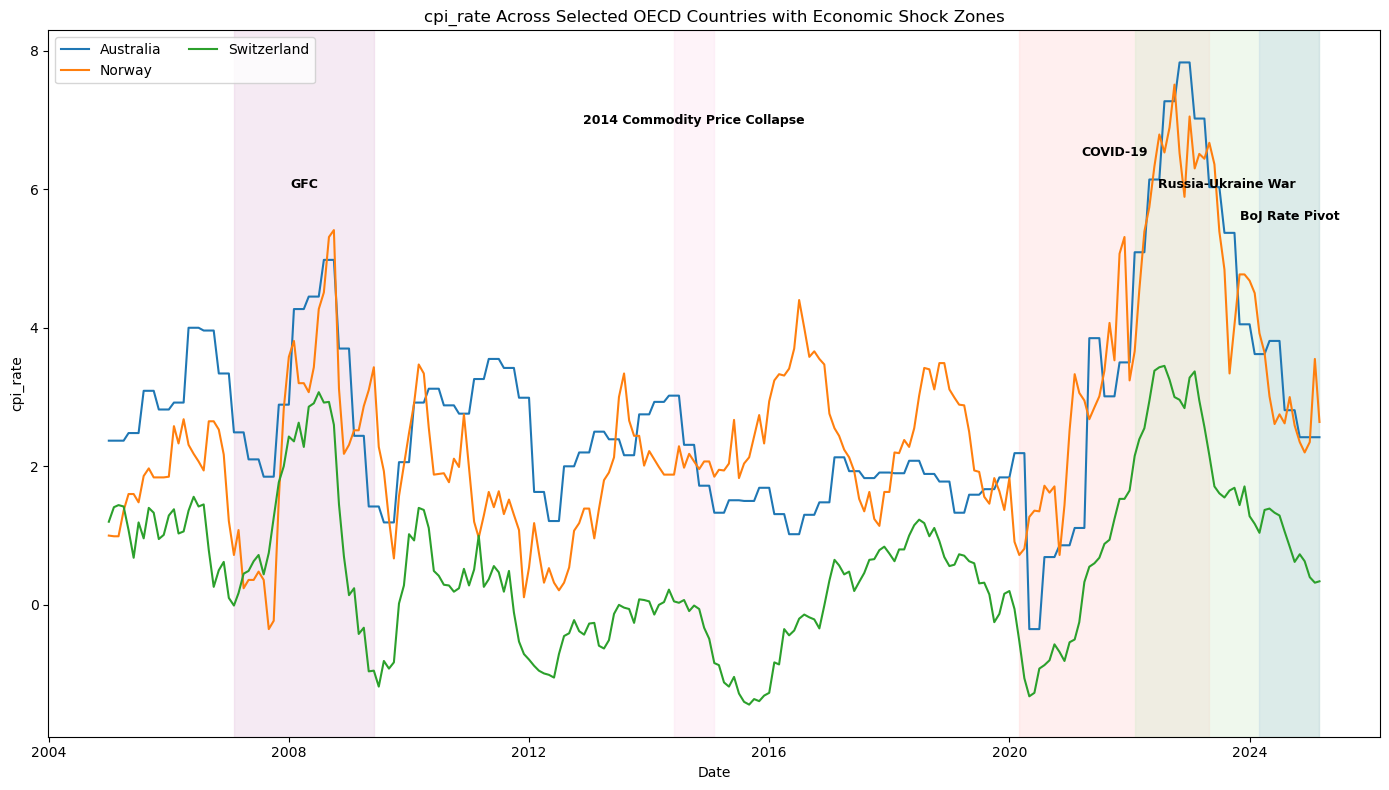

In [276]:
# Call the function to plot consumer price index time series data for 3 more countries

shock_flags = {
    "GFC": "gfc_flag",
    "2014 Commodity Price Collapse": "cpc_flag",
    "COVID-19": "cov_19_flag",
    "Russia-Ukraine War": "rus_ukr_war_flag",
    "BoJ Rate Pivot": "boj_int_rate_flag"
}

shock_colors = {
    "GFC": "#e0bbd8",
    "2014 Commodity Price Collapse": "#fddaec",
    "COVID-19": "#ffcccc",
    "Russia-Ukraine War": "#ccebc5",
    "BoJ Rate Pivot": "#b3cde3"
}

plot_multicountry_variable_with_shocks(
    df=oecd_ctry_7,
    countries=['Australia', 'Norway', 'Switzerland'],
    variable='cpi_rate',
    shock_flags=shock_flags,
    shock_colors=shock_colors
)

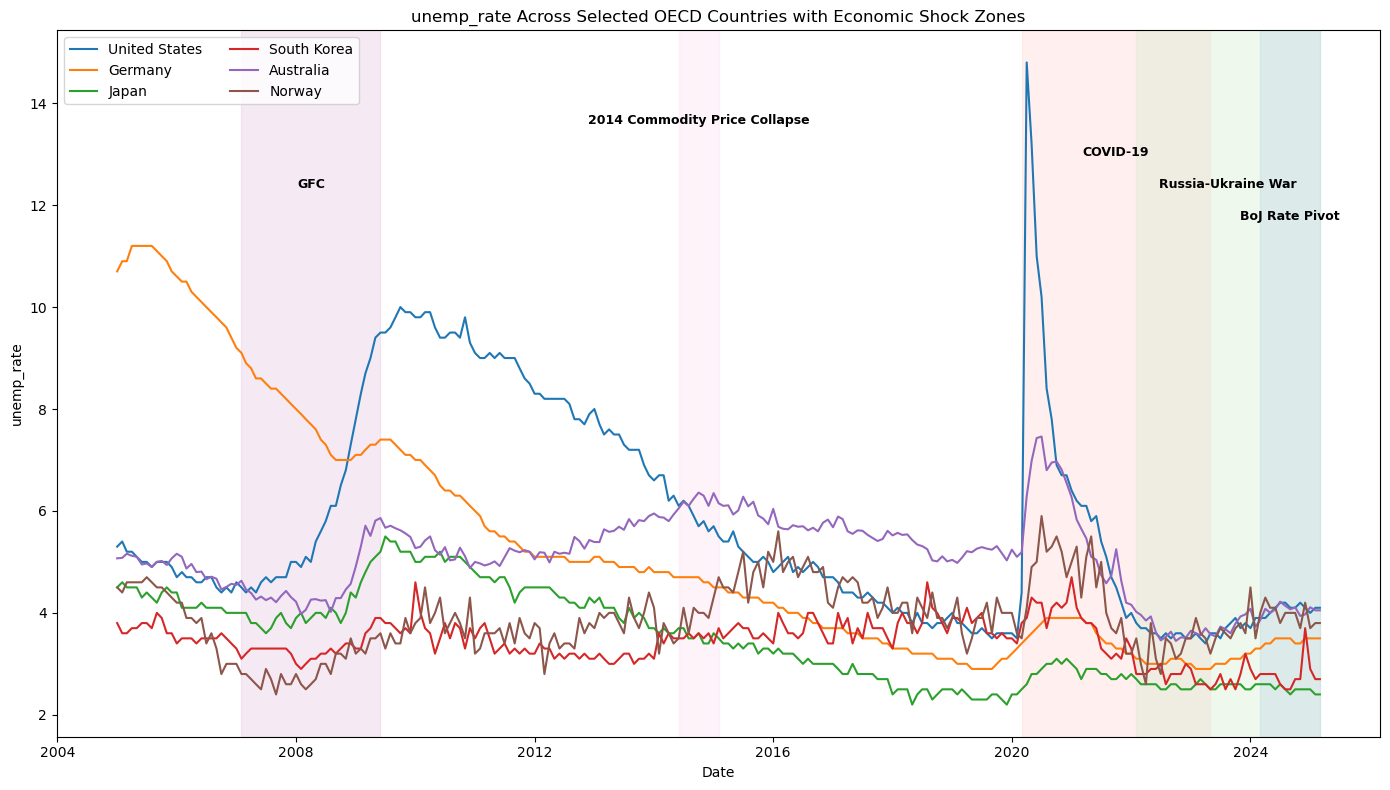

In [254]:
# Plot unemployment rate time series data for 6 countries (Switzerland omitted due to all NaNs for the variable)

shock_flags = {
    "GFC": "gfc_flag",
    "2014 Commodity Price Collapse": "cpc_flag",
    "COVID-19": "cov_19_flag",
    "Russia-Ukraine War": "rus_ukr_war_flag",
    "BoJ Rate Pivot": "boj_int_rate_flag"
}

shock_colors = {
    "GFC": "#e0bbd8",
    "2014 Commodity Price Collapse": "#fddaec",
    "COVID-19": "#ffcccc",
    "Russia-Ukraine War": "#ccebc5",
    "BoJ Rate Pivot": "#b3cde3"
}

plot_multicountry_variable_with_shocks(
    df=oecd_ctry_7,
    countries=['United States', 'Germany', 'Japan', 'South Korea', 'Australia', 'Norway'],
    variable='unemp_rate',
    shock_flags=shock_flags,
    shock_colors=shock_colors
)

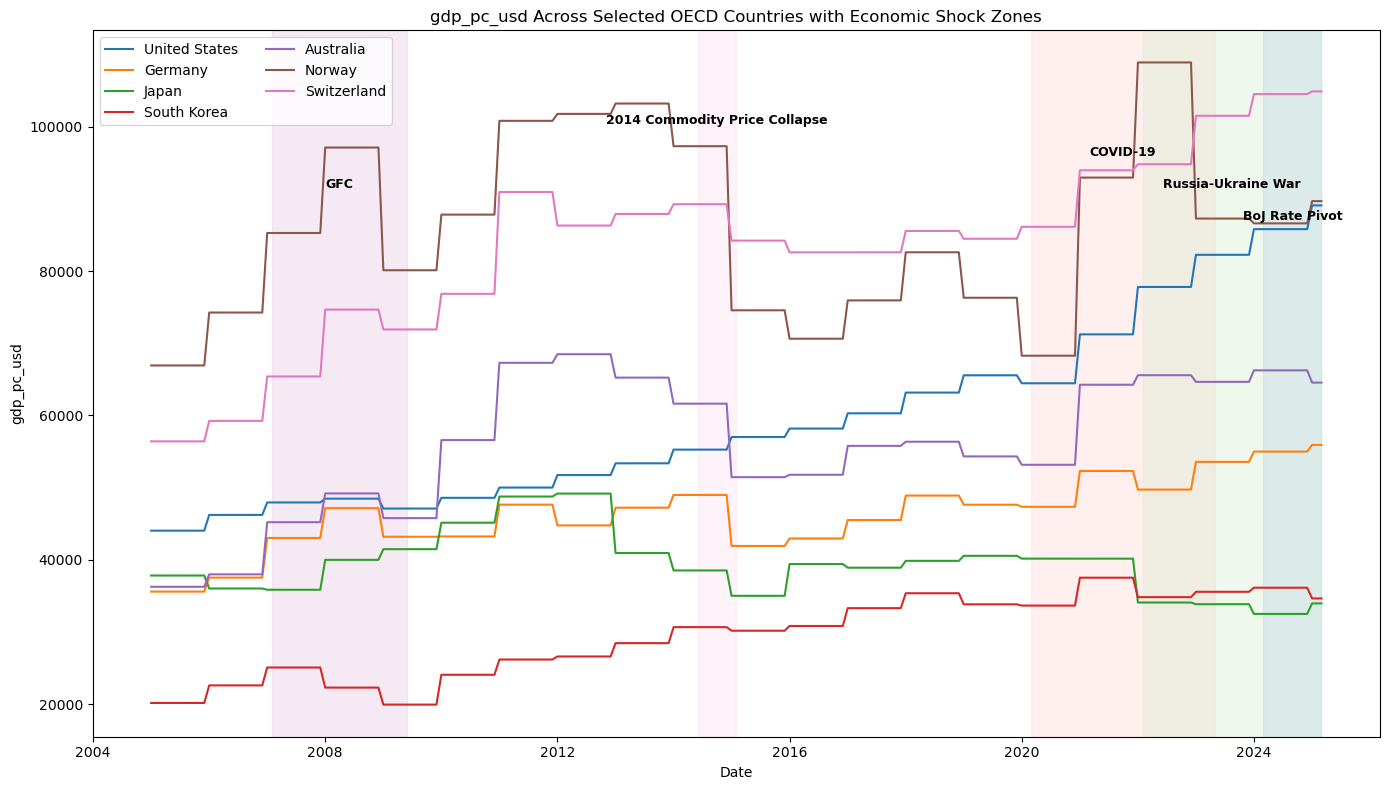

In [258]:
# Plot GDP per Capita (USD) time series data for 7 countries

shock_flags = {
    "GFC": "gfc_flag",
    "2014 Commodity Price Collapse": "cpc_flag",
    "COVID-19": "cov_19_flag",
    "Russia-Ukraine War": "rus_ukr_war_flag",
    "BoJ Rate Pivot": "boj_int_rate_flag"
}

shock_colors = {
    "GFC": "#e0bbd8",
    "2014 Commodity Price Collapse": "#fddaec",
    "COVID-19": "#ffcccc",
    "Russia-Ukraine War": "#ccebc5",
    "BoJ Rate Pivot": "#b3cde3"
}

plot_multicountry_variable_with_shocks(
    df=oecd_ctry_7,
    countries=['United States', 'Germany', 'Japan', 'South Korea', 'Australia', 'Norway', 'Switzerland'],
    variable='gdp_pc_usd',
    shock_flags=shock_flags,
    shock_colors=shock_colors
)

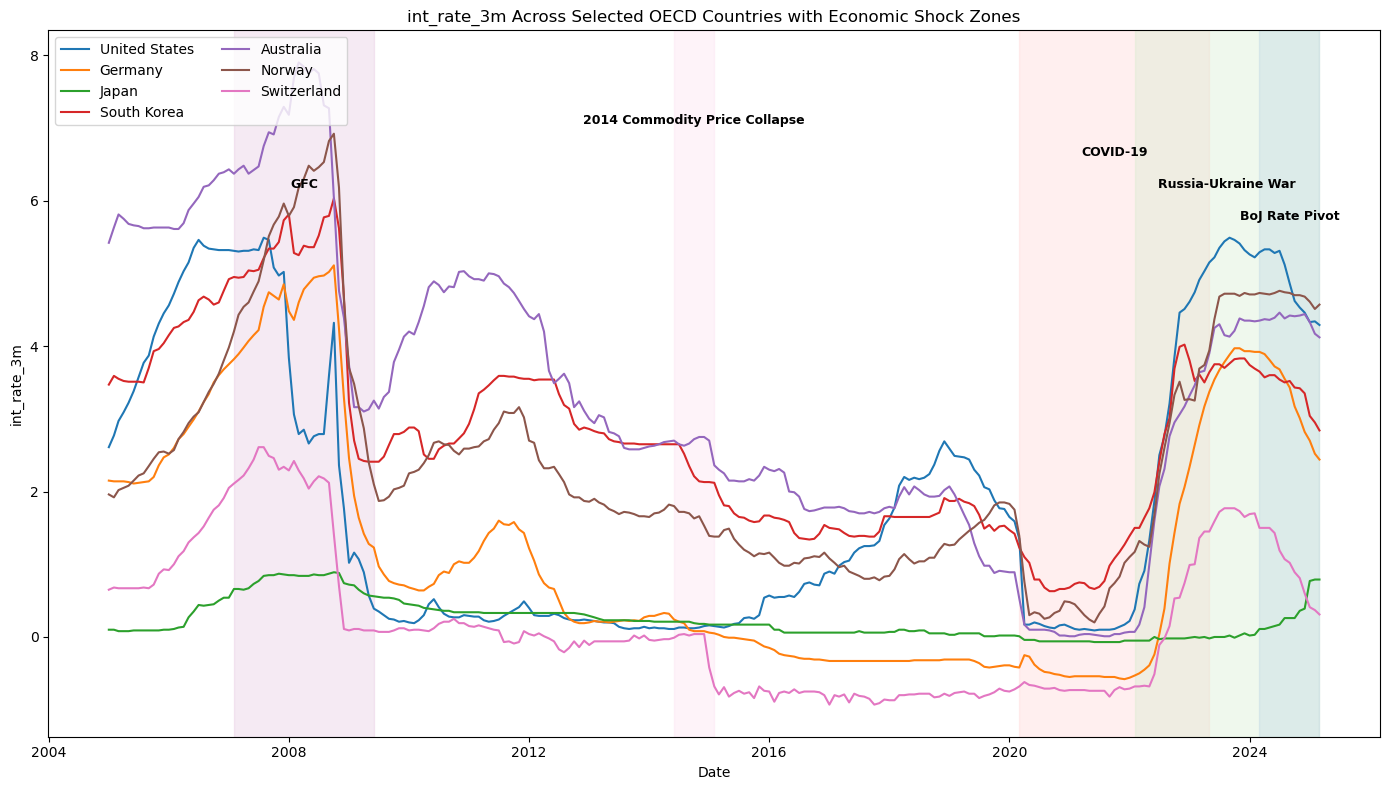

In [260]:
# Plot 3-month interest rate time series data for 7 countries

shock_flags = {
    "GFC": "gfc_flag",
    "2014 Commodity Price Collapse": "cpc_flag",
    "COVID-19": "cov_19_flag",
    "Russia-Ukraine War": "rus_ukr_war_flag",
    "BoJ Rate Pivot": "boj_int_rate_flag"
}

shock_colors = {
    "GFC": "#e0bbd8",
    "2014 Commodity Price Collapse": "#fddaec",
    "COVID-19": "#ffcccc",
    "Russia-Ukraine War": "#ccebc5",
    "BoJ Rate Pivot": "#b3cde3"
}

plot_multicountry_variable_with_shocks(
    df=oecd_ctry_7,
    countries=['United States', 'Germany', 'Japan', 'South Korea', 'Australia', 'Norway', 'Switzerland'],
    variable='int_rate_3m',
    shock_flags=shock_flags,
    shock_colors=shock_colors
)

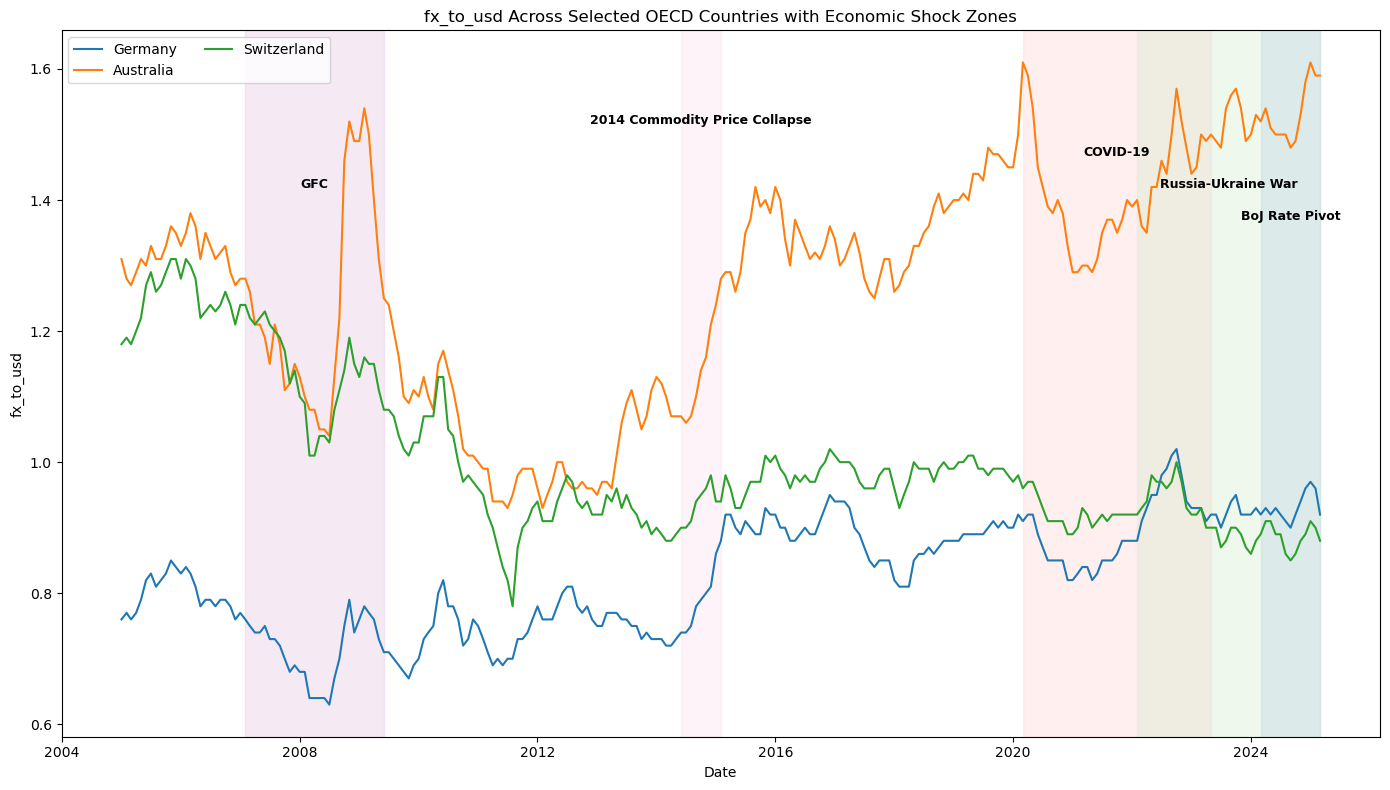

In [268]:
# Plot local currency (foreign exchange) rate to 1 USD time series data for 3 countries

shock_flags = {
    "GFC": "gfc_flag",
    "2014 Commodity Price Collapse": "cpc_flag",
    "COVID-19": "cov_19_flag",
    "Russia-Ukraine War": "rus_ukr_war_flag",
    "BoJ Rate Pivot": "boj_int_rate_flag"
}

shock_colors = {
    "GFC": "#e0bbd8",
    "2014 Commodity Price Collapse": "#fddaec",
    "COVID-19": "#ffcccc",
    "Russia-Ukraine War": "#ccebc5",
    "BoJ Rate Pivot": "#b3cde3"
}

plot_multicountry_variable_with_shocks(
    df=oecd_ctry_7,
    countries=['Germany', 'Australia', 'Switzerland'],
    variable='fx_to_usd',
    shock_flags=shock_flags,
    shock_colors=shock_colors
)

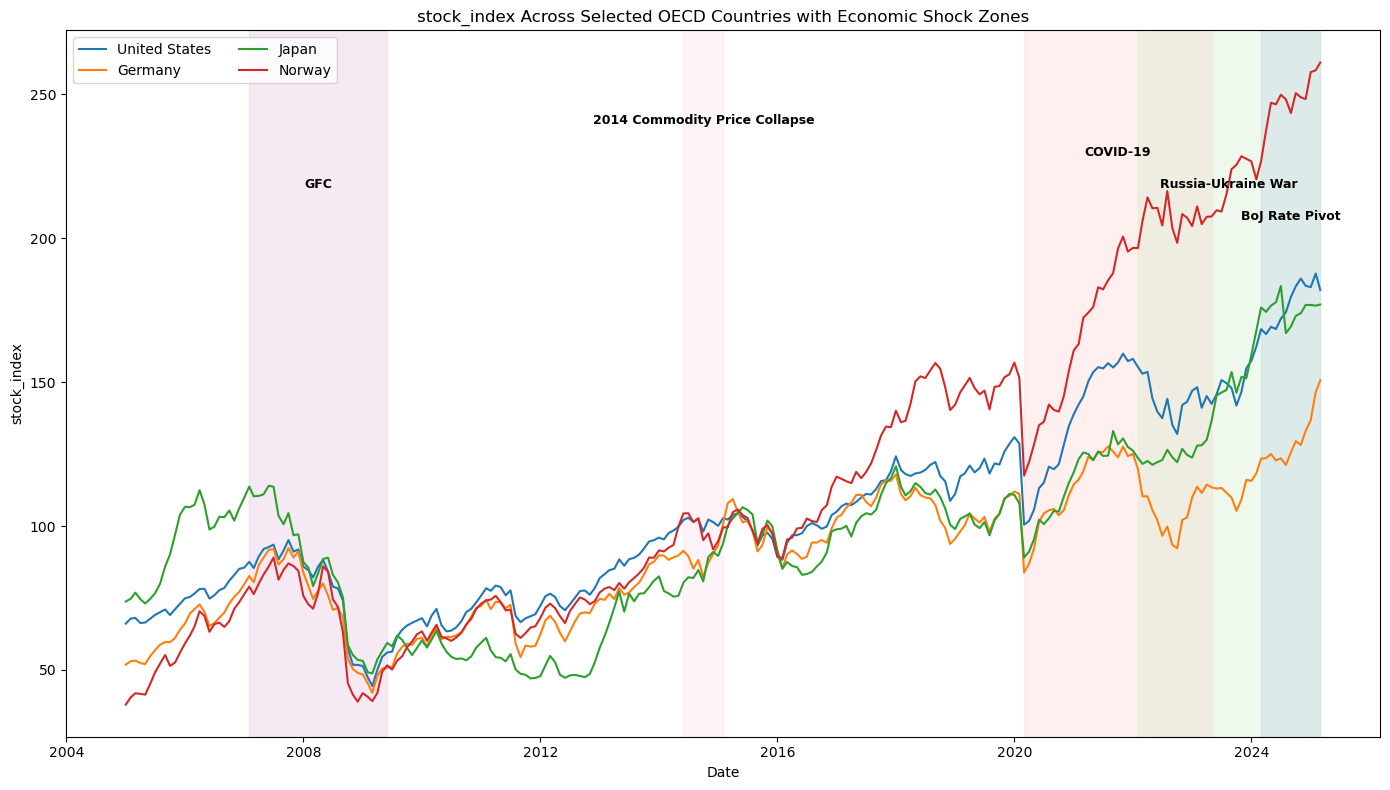

In [298]:
# Plot primary stock market index time series data for 4 countries

shock_flags = {
    "GFC": "gfc_flag",
    "2014 Commodity Price Collapse": "cpc_flag",
    "COVID-19": "cov_19_flag",
    "Russia-Ukraine War": "rus_ukr_war_flag",
    "BoJ Rate Pivot": "boj_int_rate_flag"
}

shock_colors = {
    "GFC": "#e0bbd8",
    "2014 Commodity Price Collapse": "#fddaec",
    "COVID-19": "#ffcccc",
    "Russia-Ukraine War": "#ccebc5",
    "BoJ Rate Pivot": "#b3cde3"
}

plot_multicountry_variable_with_shocks(
    df=oecd_ctry_7,
    countries=['United States', 'Germany', 'Japan', 'Norway'],
    variable='stock_index',
    shock_flags=shock_flags,
    shock_colors=shock_colors
)

#### Selected FX pairs, VIX and commodities 

#### Create custom function to line plot one or more variables, with an exogenous economic shocks temporal overlay

In [280]:
def plot_multivariable_with_colored_shocks(df, vars_to_plot, shock_flags, shock_colors, save_dir=None):
    plt.figure(figsize=(14, 8))

    for var in vars_to_plot:
        if var not in df.columns:
            print(f"Warning: {var} not found in DataFrame columns.")
            continue
        plt.plot(df['timestamp'], df[var], label=var)

    # Plot shaded economic shock zones
    for shock_name, flag_col in shock_flags.items():
        if flag_col not in df.columns:
            continue
        shock_periods = df[df[flag_col] == True]
        if not shock_periods.empty:
            plt.axvspan(shock_periods['timestamp'].iloc[0],
                        shock_periods['timestamp'].iloc[-1],
                        color=shock_colors.get(shock_name, '#cccccc'),
                        alpha=0.3,
                        label=shock_name)

    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.title(f"{', '.join(vars_to_plot).upper()} with Economic Shock Zones")
    plt.legend(loc='best', fontsize=9)
    plt.tight_layout()

    # Save plot if save_dir is specified
    if save_dir:
        save_dir = Path(save_dir)
        save_dir.mkdir(parents=True, exist_ok=True)
        filename = "_".join(vars_to_plot).lower() + "_shock_plot.png"
        plt.savefig(save_dir / filename, bbox_inches='tight')

    plt.show()
    plt.close()

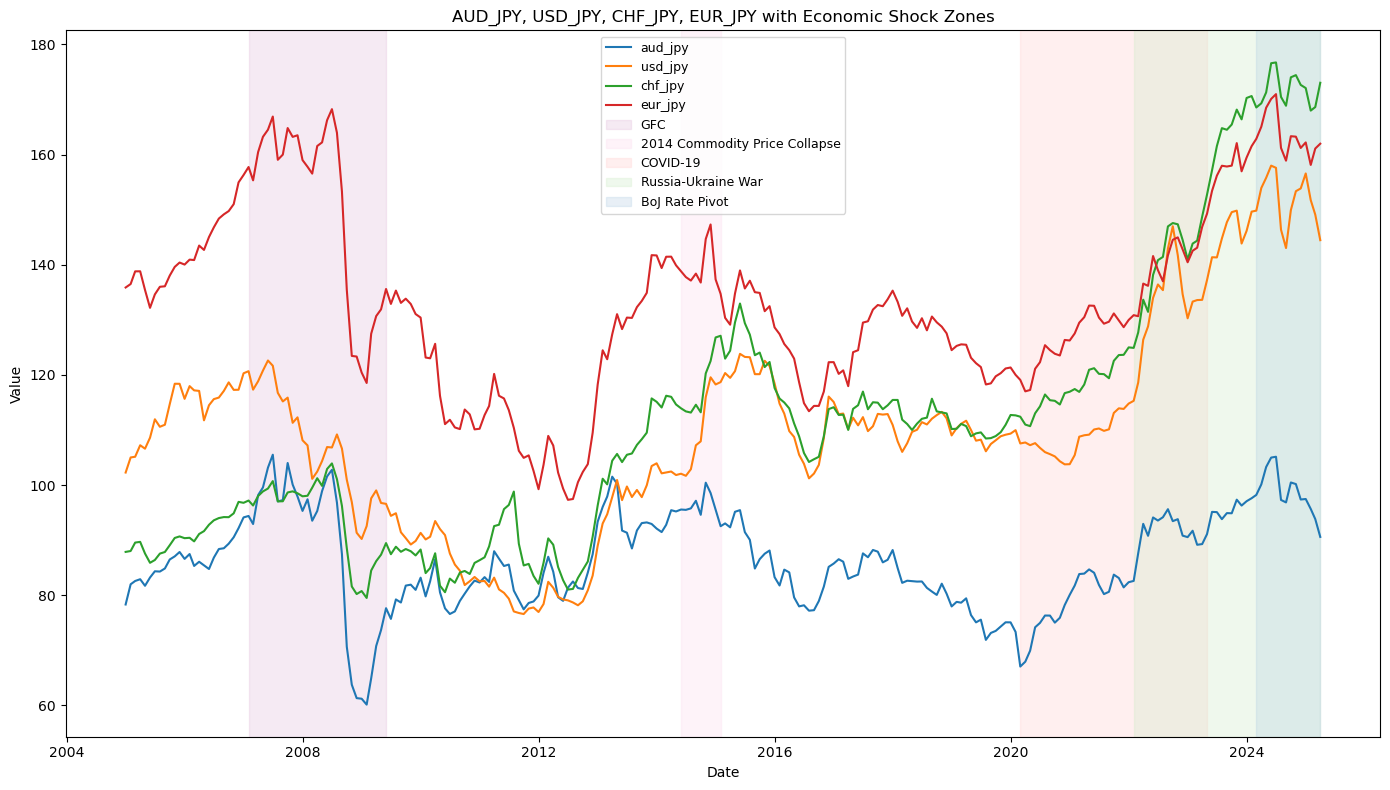

In [284]:
# Call the function to plot selected cross-currency pairs time series data

shock_flags = {
    "GFC": "gfc_flag",
    "2014 Commodity Price Collapse": "cpc_flag",
    "COVID-19": "cov_19_flag",
    "Russia-Ukraine War": "rus_ukr_war_flag",
    "BoJ Rate Pivot": "boj_int_rate_flag"
}

shock_colors = {
    "GFC": "#e0bbd8",
    "2014 Commodity Price Collapse": "#fddaec",
    "COVID-19": "#ffcccc",
    "Russia-Ukraine War": "#ccebc5",
    "BoJ Rate Pivot": "#b3cde3"
}

vars_to_plot_list = ['aud_jpy', 'usd_jpy', 'chf_jpy', 'eur_jpy']

plot_multivariable_with_colored_shocks(
    df=fx_vix_comm,
    vars_to_plot=vars_to_plot_list,
    shock_flags=shock_flags,
    shock_colors=shock_colors
)

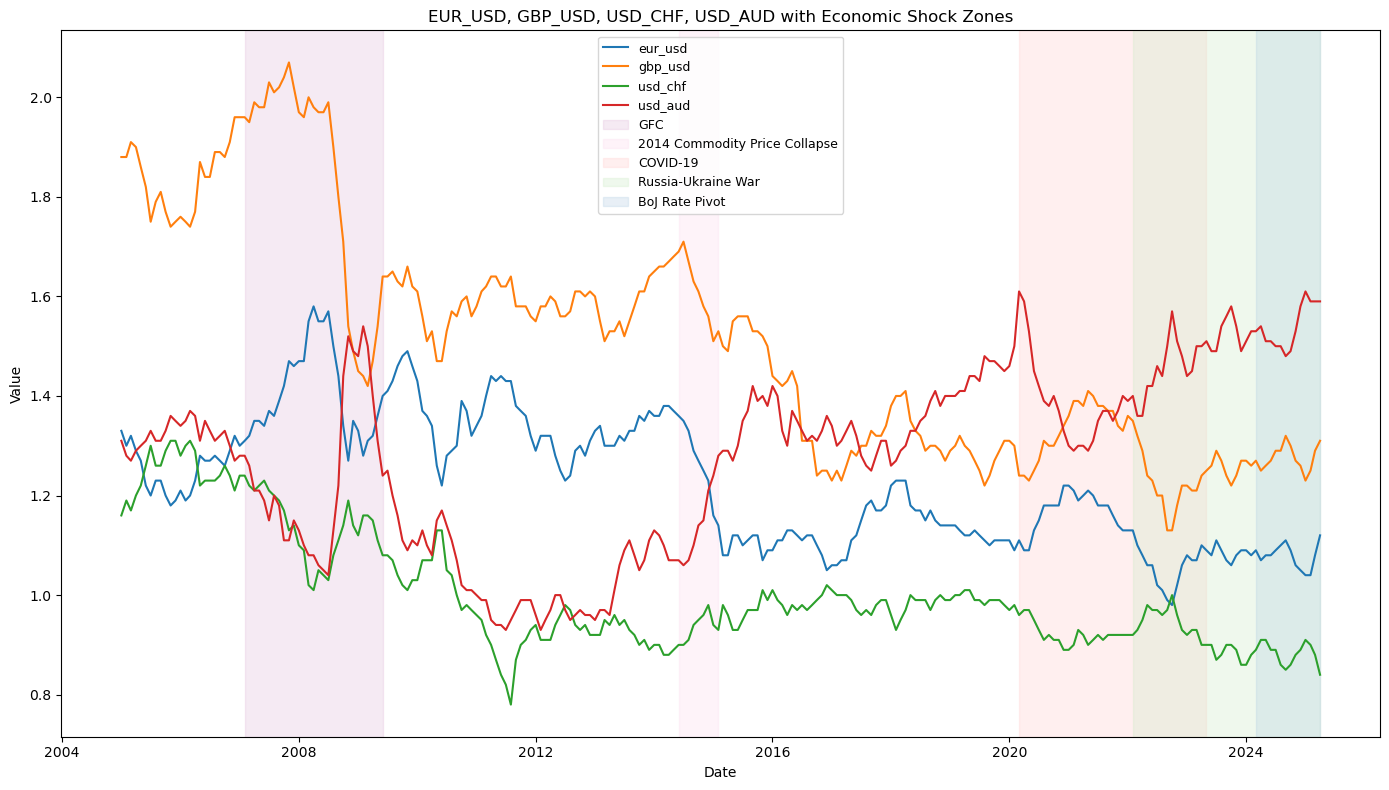

In [288]:
# Call the function to plot other selected cross-currency pairs time series data

shock_flags = {
    "GFC": "gfc_flag",
    "2014 Commodity Price Collapse": "cpc_flag",
    "COVID-19": "cov_19_flag",
    "Russia-Ukraine War": "rus_ukr_war_flag",
    "BoJ Rate Pivot": "boj_int_rate_flag"
}

shock_colors = {
    "GFC": "#e0bbd8",
    "2014 Commodity Price Collapse": "#fddaec",
    "COVID-19": "#ffcccc",
    "Russia-Ukraine War": "#ccebc5",
    "BoJ Rate Pivot": "#b3cde3"
}

vars_to_plot_list = ['eur_usd', 'gbp_usd', 'usd_chf', 'usd_aud']

plot_multivariable_with_colored_shocks(
    df=fx_vix_comm,
    vars_to_plot=vars_to_plot_list,
    shock_flags=shock_flags,
    shock_colors=shock_colors
)

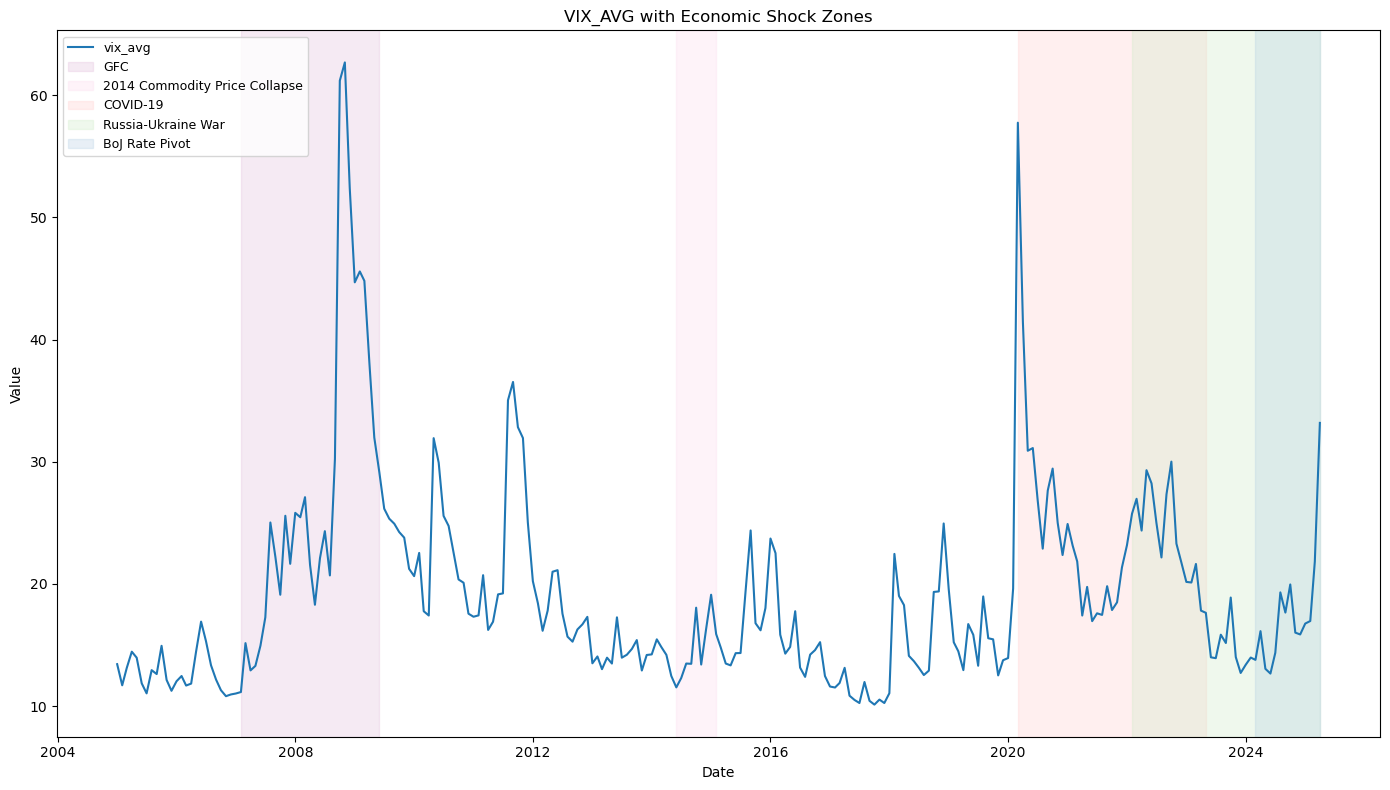

In [290]:
# Call the function to plot the CBOE VIX time series data

shock_flags = {
    "GFC": "gfc_flag",
    "2014 Commodity Price Collapse": "cpc_flag",
    "COVID-19": "cov_19_flag",
    "Russia-Ukraine War": "rus_ukr_war_flag",
    "BoJ Rate Pivot": "boj_int_rate_flag"
}

shock_colors = {
    "GFC": "#e0bbd8",
    "2014 Commodity Price Collapse": "#fddaec",
    "COVID-19": "#ffcccc",
    "Russia-Ukraine War": "#ccebc5",
    "BoJ Rate Pivot": "#b3cde3"
}

vars_to_plot_list = ['vix_avg']

plot_multivariable_with_colored_shocks(
    df=fx_vix_comm,
    vars_to_plot=vars_to_plot_list,
    shock_flags=shock_flags,
    shock_colors=shock_colors
)

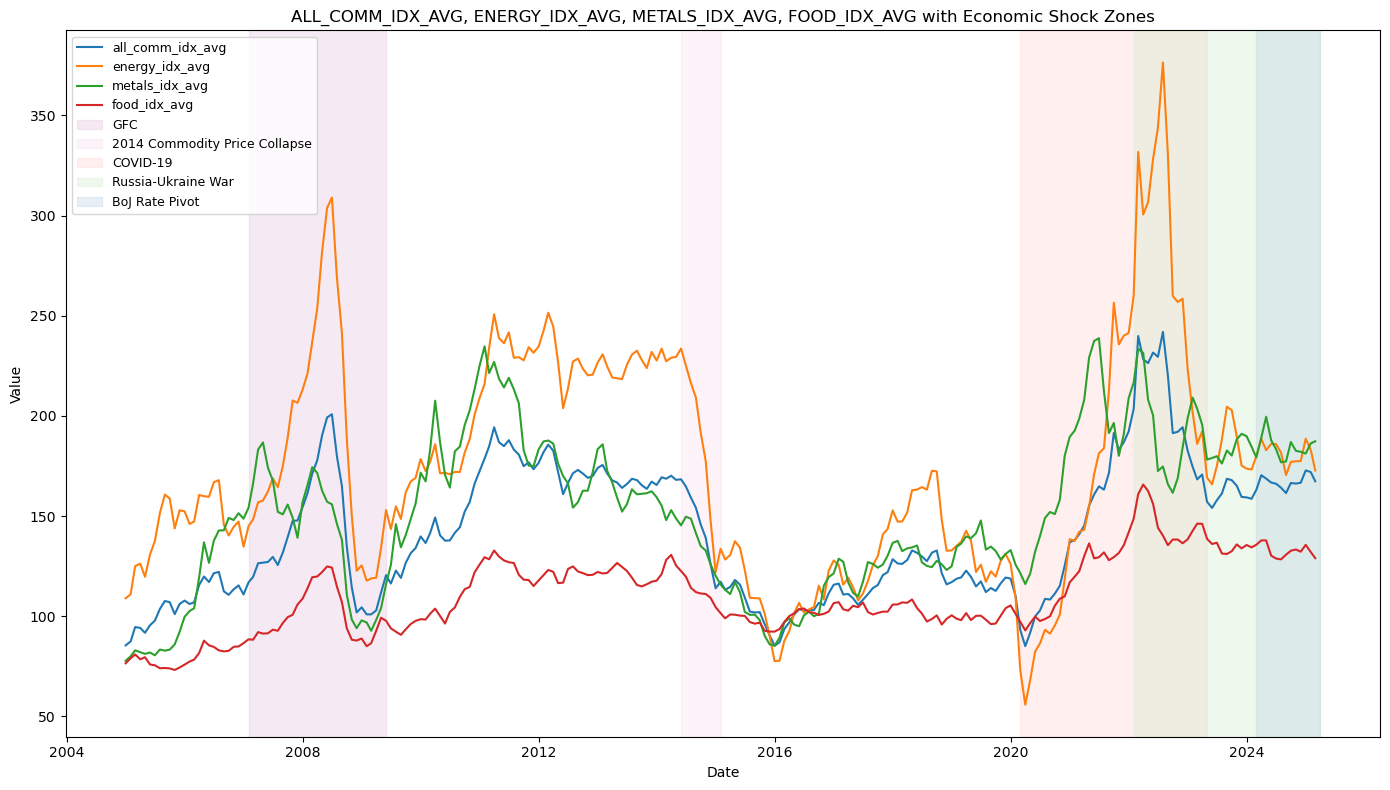

In [302]:
# Call the function to plot commodity price indices time series data

shock_flags = {
    "GFC": "gfc_flag",
    "2014 Commodity Price Collapse": "cpc_flag",
    "COVID-19": "cov_19_flag",
    "Russia-Ukraine War": "rus_ukr_war_flag",
    "BoJ Rate Pivot": "boj_int_rate_flag"
}

shock_colors = {
    "GFC": "#e0bbd8",
    "2014 Commodity Price Collapse": "#fddaec",
    "COVID-19": "#ffcccc",
    "Russia-Ukraine War": "#ccebc5",
    "BoJ Rate Pivot": "#b3cde3"
}

vars_to_plot_list = ['all_comm_idx_avg', 'energy_idx_avg', 'metals_idx_avg', 'food_idx_avg']

plot_multivariable_with_colored_shocks(
    df=fx_vix_comm,
    vars_to_plot=vars_to_plot_list,
    shock_flags=shock_flags,
    shock_colors=shock_colors
)

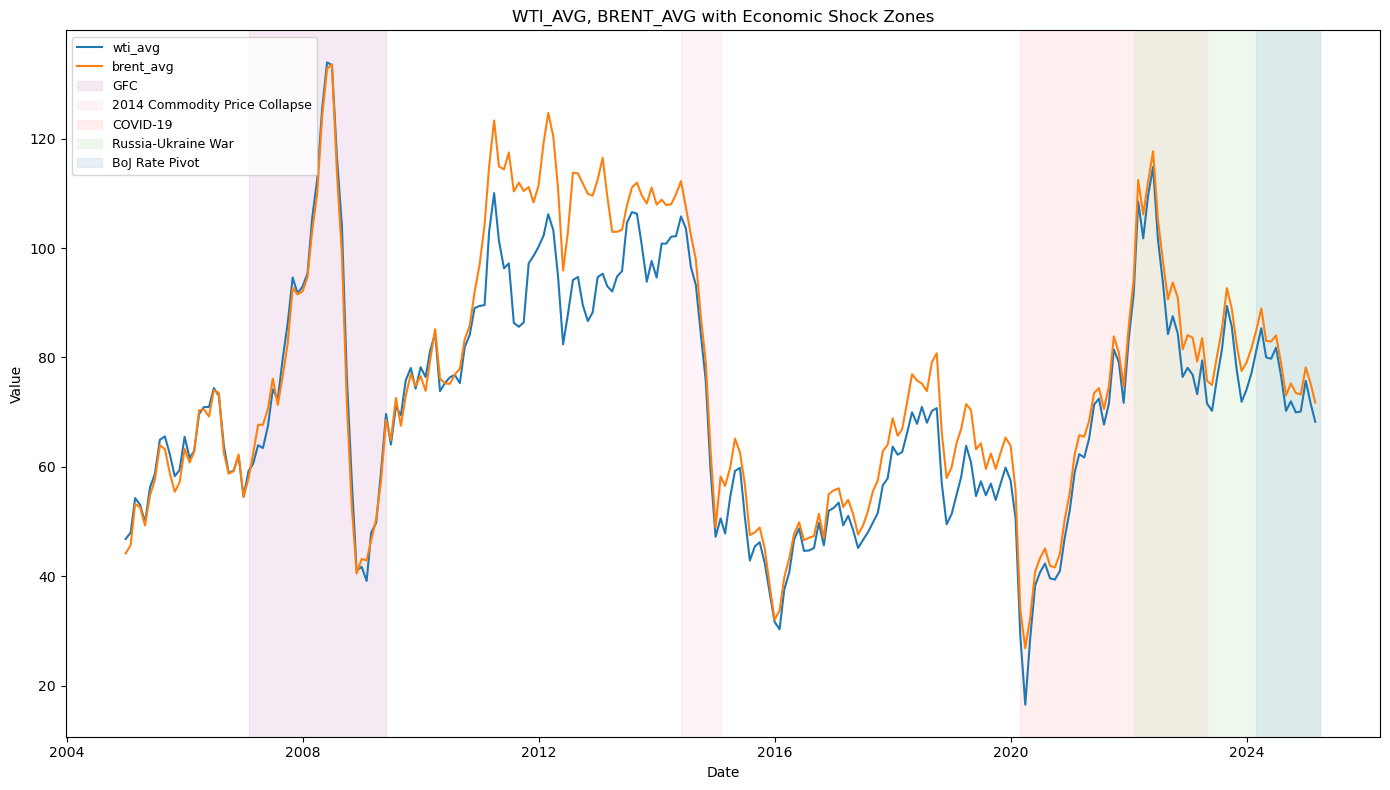

In [310]:
# Call the function to plot crude oil commodities price time series data

shock_flags = {
    "GFC": "gfc_flag",
    "2014 Commodity Price Collapse": "cpc_flag",
    "COVID-19": "cov_19_flag",
    "Russia-Ukraine War": "rus_ukr_war_flag",
    "BoJ Rate Pivot": "boj_int_rate_flag"
}

shock_colors = {
    "GFC": "#e0bbd8",
    "2014 Commodity Price Collapse": "#fddaec",
    "COVID-19": "#ffcccc",
    "Russia-Ukraine War": "#ccebc5",
    "BoJ Rate Pivot": "#b3cde3"
}

vars_to_plot_list = ['wti_avg', 'brent_avg']

plot_multivariable_with_colored_shocks(
    df=fx_vix_comm,
    vars_to_plot=vars_to_plot_list,
    shock_flags=shock_flags,
    shock_colors=shock_colors
)

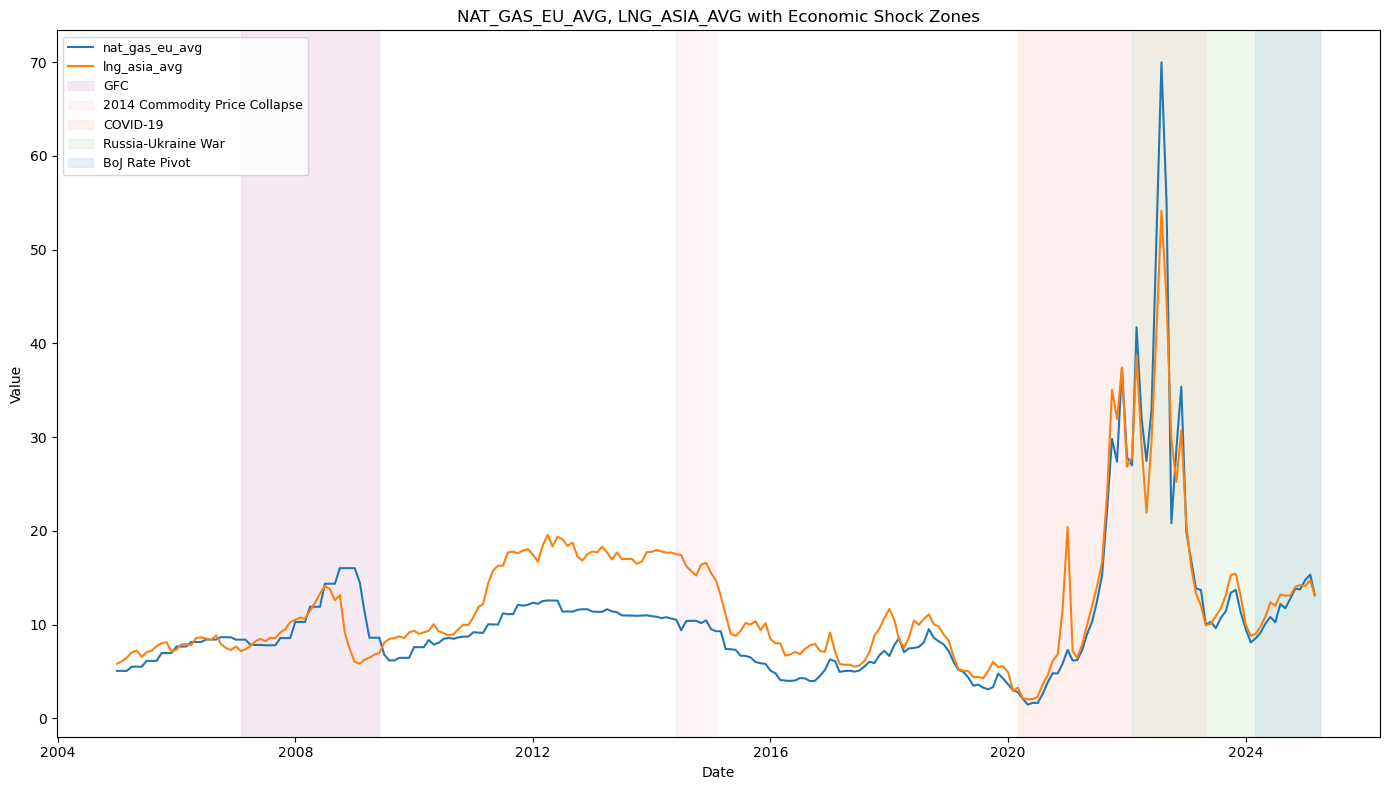

In [308]:
# Call the function to plot natural gas commodities price time series data

shock_flags = {
    "GFC": "gfc_flag",
    "2014 Commodity Price Collapse": "cpc_flag",
    "COVID-19": "cov_19_flag",
    "Russia-Ukraine War": "rus_ukr_war_flag",
    "BoJ Rate Pivot": "boj_int_rate_flag"
}

shock_colors = {
    "GFC": "#e0bbd8",
    "2014 Commodity Price Collapse": "#fddaec",
    "COVID-19": "#ffcccc",
    "Russia-Ukraine War": "#ccebc5",
    "BoJ Rate Pivot": "#b3cde3"
}

vars_to_plot_list = ['nat_gas_eu_avg', 'lng_asia_avg']

plot_multivariable_with_colored_shocks(
    df=fx_vix_comm,
    vars_to_plot=vars_to_plot_list,
    shock_flags=shock_flags,
    shock_colors=shock_colors
)

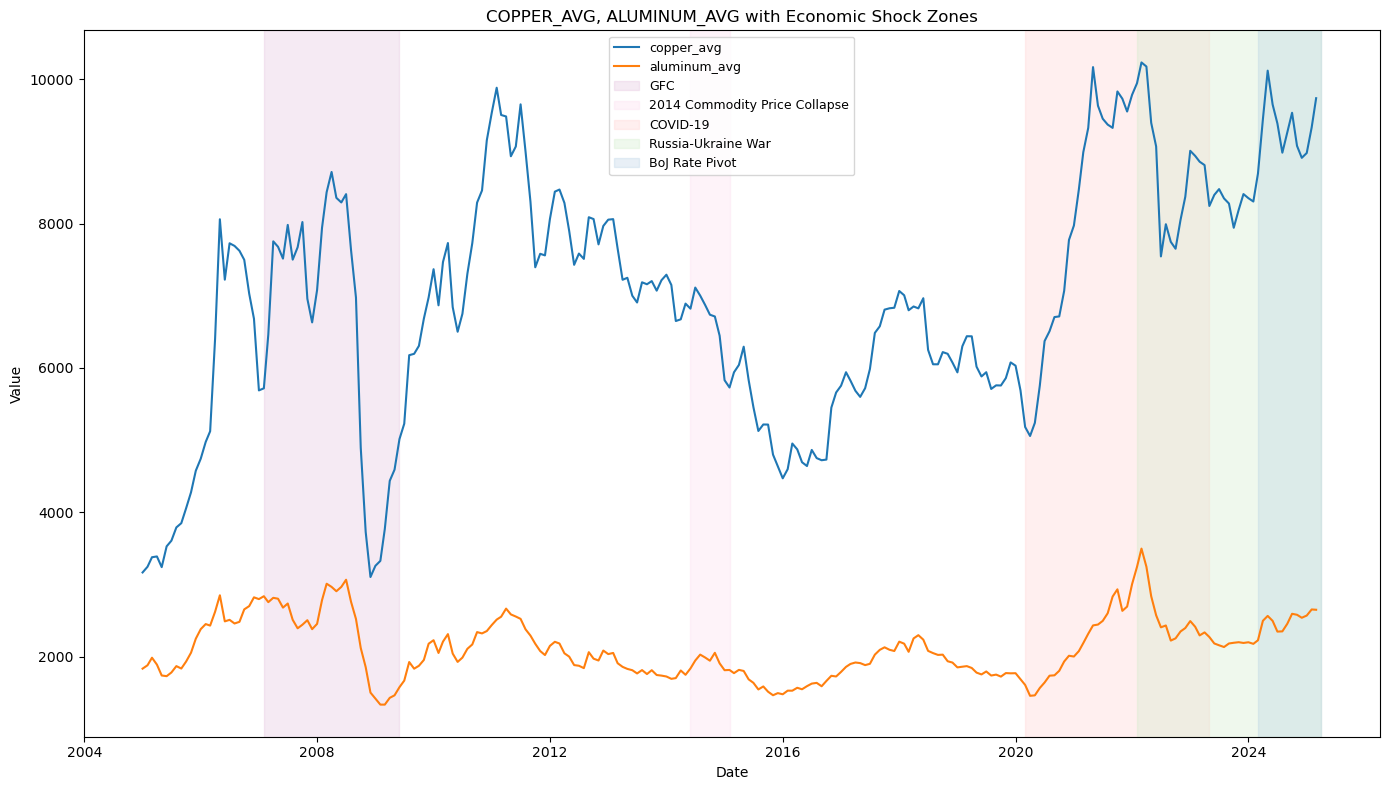

In [314]:
# Call the function to plot copper and aluminum price time series data

shock_flags = {
    "GFC": "gfc_flag",
    "2014 Commodity Price Collapse": "cpc_flag",
    "COVID-19": "cov_19_flag",
    "Russia-Ukraine War": "rus_ukr_war_flag",
    "BoJ Rate Pivot": "boj_int_rate_flag"
}

shock_colors = {
    "GFC": "#e0bbd8",
    "2014 Commodity Price Collapse": "#fddaec",
    "COVID-19": "#ffcccc",
    "Russia-Ukraine War": "#ccebc5",
    "BoJ Rate Pivot": "#b3cde3"
}

vars_to_plot_list = ['copper_avg', 'aluminum_avg']

plot_multivariable_with_colored_shocks(
    df=fx_vix_comm,
    vars_to_plot=vars_to_plot_list,
    shock_flags=shock_flags,
    shock_colors=shock_colors
)

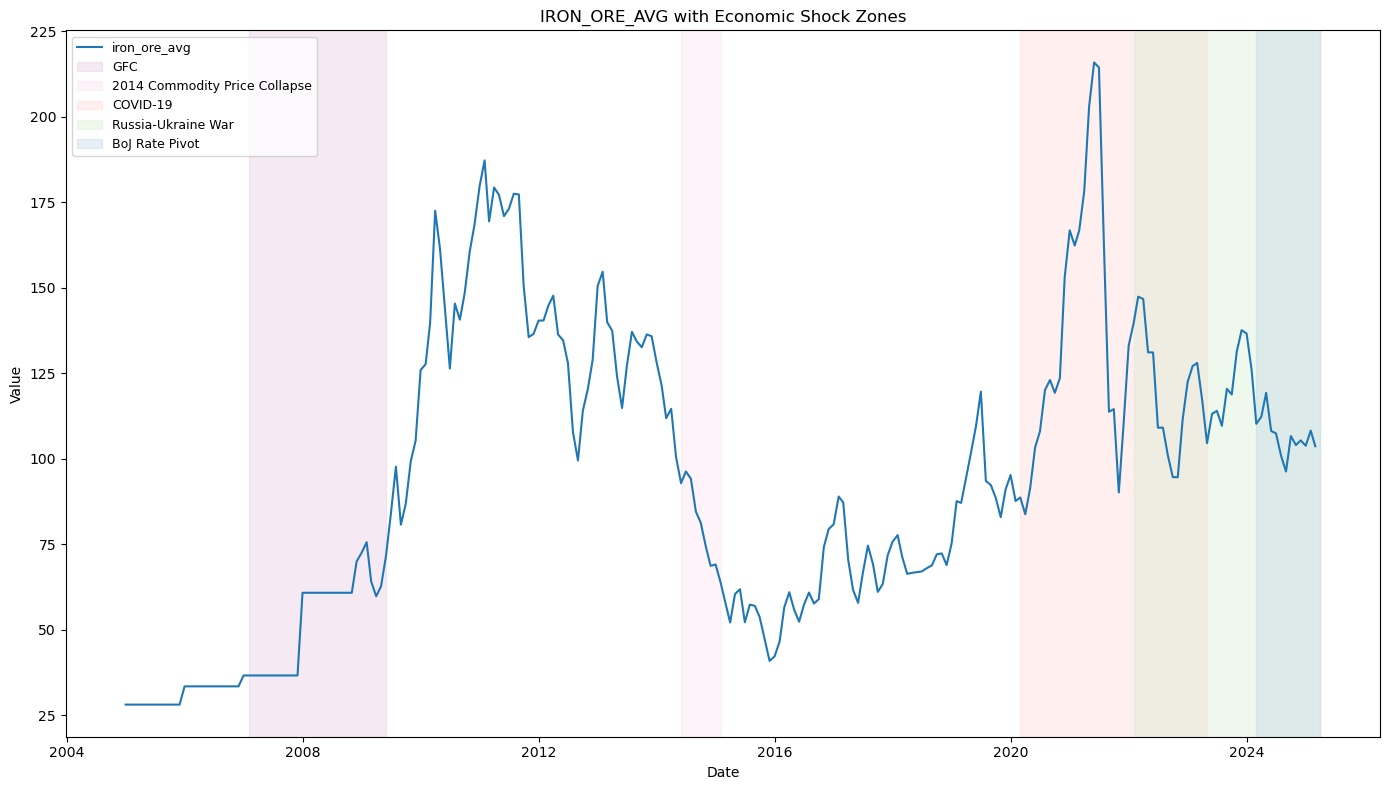

In [316]:
# Call the function to plot iron ore price time series data

shock_flags = {
    "GFC": "gfc_flag",
    "2014 Commodity Price Collapse": "cpc_flag",
    "COVID-19": "cov_19_flag",
    "Russia-Ukraine War": "rus_ukr_war_flag",
    "BoJ Rate Pivot": "boj_int_rate_flag"
}

shock_colors = {
    "GFC": "#e0bbd8",
    "2014 Commodity Price Collapse": "#fddaec",
    "COVID-19": "#ffcccc",
    "Russia-Ukraine War": "#ccebc5",
    "BoJ Rate Pivot": "#b3cde3"
}

vars_to_plot_list = ['iron_ore_avg']

plot_multivariable_with_colored_shocks(
    df=fx_vix_comm,
    vars_to_plot=vars_to_plot_list,
    shock_flags=shock_flags,
    shock_colors=shock_colors
)

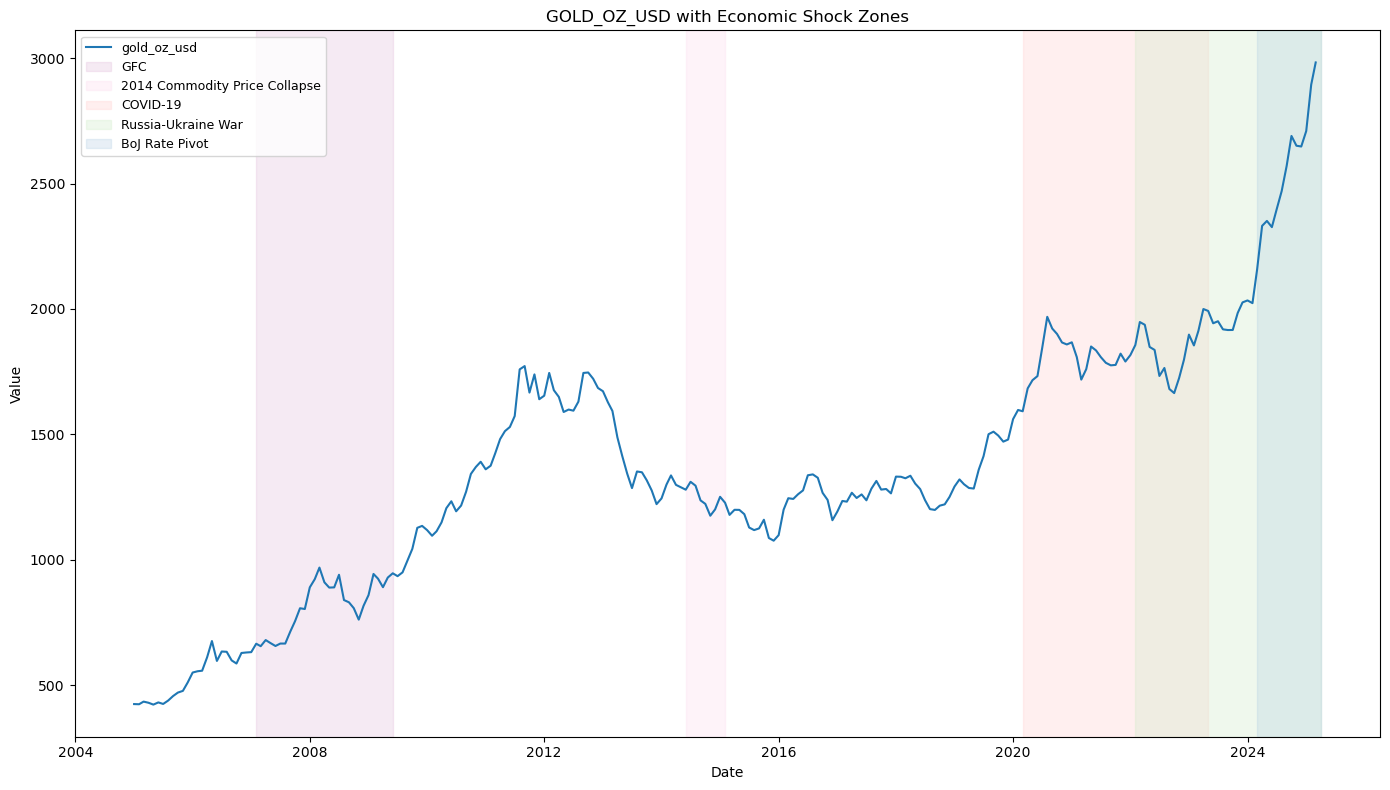

In [320]:
# Call the function to plot gold price time series data

shock_flags = {
    "GFC": "gfc_flag",
    "2014 Commodity Price Collapse": "cpc_flag",
    "COVID-19": "cov_19_flag",
    "Russia-Ukraine War": "rus_ukr_war_flag",
    "BoJ Rate Pivot": "boj_int_rate_flag"
}

shock_colors = {
    "GFC": "#e0bbd8",
    "2014 Commodity Price Collapse": "#fddaec",
    "COVID-19": "#ffcccc",
    "Russia-Ukraine War": "#ccebc5",
    "BoJ Rate Pivot": "#b3cde3"
}

vars_to_plot_list = ['gold_oz_usd']

plot_multivariable_with_colored_shocks(
    df=fx_vix_comm,
    vars_to_plot=vars_to_plot_list,
    shock_flags=shock_flags,
    shock_colors=shock_colors
)